In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from scipy.stats import gmean
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import DMatrix


from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier

In [2]:
#conda install -c anaconda py-xgboost

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


def acc(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits(X_train.values)
    cv_auc = cross_val_score(model,X_train ,y_train, cv = kf, scoring = "roc_auc")
    return (cv_auc)


In [5]:
X_train = pd.read_csv('xtrain10.csv')
y_train = pd.read_csv('ytrain.csv')

In [6]:
y_train

,TARGET
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
76015,0.0
76016,0.0
76017,0.0
76018,0.0


In [7]:
X_train.drop('Unnamed: 0',axis=1, inplace = True)

In [8]:
y_train = np.ravel(y_train)

In [9]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
X_train

,var15,ind_var5,ind_var8_0,ind_var30,num_var5,num_var8_0,num_var30_0,num_var30,num_var42,saldo_var30,var36,num_meses_var5_ult3,num_var4,num_var35
0,23,0,0,0,0,0,3,0,0,0.00,99,0,0,0
1,34,0,0,1,0,0,6,3,0,300.00,3,1,1,3
2,23,1,0,1,3,0,3,3,3,3.00,99,3,1,3
3,37,1,0,1,3,0,3,3,3,70.62,2,2,3,9
4,39,0,0,1,0,0,6,3,3,135003.00,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0,0,0,0,0,3,0,0,0.00,99,0,0,0
76016,39,0,0,1,0,0,6,3,3,48191.22,2,1,1,3
76017,23,1,0,1,3,0,3,3,3,3.00,99,2,1,3
76018,25,1,0,1,3,0,3,3,3,3.00,99,3,1,3


In [11]:
type(y_train)

numpy.ndarray

# Log

In [12]:
# log model
logmodel = Pipeline([
        ("scl", StandardScaler()),
        ("clf", LogisticRegressionCV(penalty="l2", cv=5, max_iter=500, scoring="roc_auc", 
                                     n_jobs=-1 ,random_state=1))
    ])

logmodel.fit(X_train,y_train)


Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegressionCV(cv=5, max_iter=500, n_jobs=-1,
                                      random_state=1, scoring='roc_auc'))])

# XGB1

In [13]:
xgbc = xgb.XGBClassifier(max_depth=5, n_estimators=200, learning_rate=0.03, nthread=4, 
                          subsample=0.6815, colsample_bytree=0.701, seed=1234)
xgbcf = xgbc.fit(X_train, y_train, eval_metric="auc", verbose=2)

#xgc1_score = np.mean(acc(xgbc))

# XGB2

In [14]:
xgbc2 = xgb.XGBClassifier(max_depth=5, n_estimators=70, learning_rate=0.1, nthread=4, gamma=0.2,
                          subsample=0.4, colsample_bytree=0.7, min_child_weight=1, seed=1)

xgbc2.fit(X_train, y_train, eval_metric="auc", verbose=0)



#sgbc2_score = np.mean(acc(xgbc2))

XGBClassifier(colsample_bytree=0.7, gamma=0.2, max_depth=5, n_estimators=70,
              nthread=4, seed=1, subsample=0.4)

# RF

In [15]:
rfc = RandomForestClassifier(n_estimators=10, criterion="entropy", max_features=None, max_depth=7,
                             min_samples_leaf=9, n_jobs=4, random_state=1)
#rfc.fit(X_train, y_train)

#rf_score = np.mean(acc(rfc))

# AVG

In [16]:
from sklearn.ensemble import VotingClassifier
estimators = [('log', logmodel), ('xgb1', xgbc),  ('xgb2' , xgbc2), ('RF' , rfc)
              ]
av_model = VotingClassifier(estimators = estimators, weights =[0.1,0.3,0.3,0.3], voting='soft')

# Stacking

In [17]:
reg_stack = StackingClassifier(classifiers=[logmodel,xgbc2, rfc],
                              meta_classifier=xgbc,use_features_in_secondary=True)
#stk_score =np.mean(acc(reg_stack))


In [18]:
X_test = pd.read_csv('xtest10.csv')
X_test.drop('Unnamed: 0',axis=1, inplace = True)

In [19]:
X_test

,var15,ind_var5,ind_var8_0,ind_var30,num_var5,num_var8_0,num_var30_0,num_var30,num_var42,saldo_var30,var36,num_meses_var5_ult3,num_var4,num_var35
0,32,1,0,1,3,0,3,3,3,6.0,3,3,1,3
1,35,1,0,1,3,0,3,3,3,3.0,3,3,1,3
2,23,1,0,1,3,0,3,3,3,30.0,3,3,2,6
3,24,0,0,0,0,0,3,0,0,0.0,99,0,0,0
4,23,1,0,1,3,0,3,3,3,30.0,3,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,23,0,0,0,0,0,3,0,0,0.0,99,0,0,0
75814,26,1,0,1,3,0,3,3,3,3.0,3,3,1,3
75815,24,1,0,1,3,0,3,3,3,90.0,99,3,1,3
75816,40,1,0,1,3,0,3,3,3,3.0,3,3,1,3


In [20]:
X_train

,var15,ind_var5,ind_var8_0,ind_var30,num_var5,num_var8_0,num_var30_0,num_var30,num_var42,saldo_var30,var36,num_meses_var5_ult3,num_var4,num_var35
0,23,0,0,0,0,0,3,0,0,0.00,99,0,0,0
1,34,0,0,1,0,0,6,3,0,300.00,3,1,1,3
2,23,1,0,1,3,0,3,3,3,3.00,99,3,1,3
3,37,1,0,1,3,0,3,3,3,70.62,2,2,3,9
4,39,0,0,1,0,0,6,3,3,135003.00,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,48,0,0,0,0,0,3,0,0,0.00,99,0,0,0
76016,39,0,0,1,0,0,6,3,3,48191.22,2,1,1,3
76017,23,1,0,1,3,0,3,3,3,3.00,99,2,1,3
76018,25,1,0,1,3,0,3,3,3,3.00,99,3,1,3


In [21]:
reg_stack.fit(X_train,y_train)

StackingClassifier(classifiers=[Pipeline(steps=[('scl', StandardScaler()),
                                                ('clf',
                                                 LogisticRegressionCV(cv=5,
                                                                      max_iter=500,
                                                                      n_jobs=-1,
                                                                      random_state=1,
                                                                      scoring='roc_auc'))]),
                                XGBClassifier(colsample_bytree=0.7, gamma=0.2,
                                              max_depth=5, n_estimators=70,
                                              nthread=4, seed=1,
                                              subsample=0.4),
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=7,
                       

In [22]:
y_pred= reg_stack.predict_proba(X_test)

In [23]:
y_pred = y_pred[:,1]

In [24]:
#samplesubmission = pd.read_csv('sample_submission.csv')

#output = pd.DataFrame({'ID': samplesubmission.ID, 'TARGET': y_pred})
#output.to_csv('submission10.csv', index=False)

# Shap Value

In [25]:
import shap

In [26]:
explainer = shap.TreeExplainer(xgbcf)

In [27]:
shap_values = explainer.shap_values(X_train)

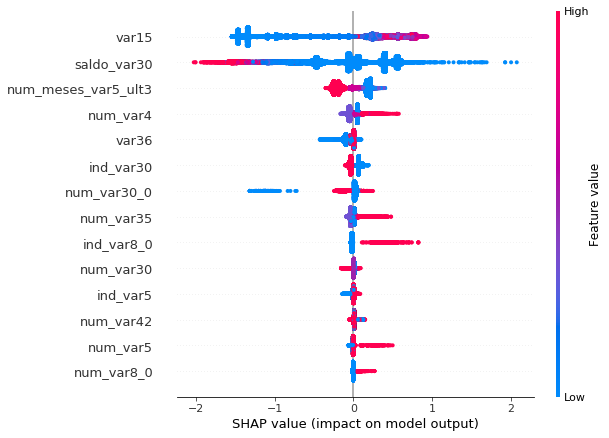

In [28]:
shap.summary_plot(shap_values, X_train)

The values in the chart below can be interpreted as the mean absolute contribution a feature makes on a model prediction.
var15 dominates the global feature importance, which means the model is placing too much importance on one variable, at least on average. If the value drift in the future, the 'TARGET' aka. customer satisfication rate would be influenced badly. Moreover, if this variable is missing for a customer We cannot predict the customer satisfaction precisely.

# PD plots

In [29]:
X_train.columns.values.tolist()  

['var15',
 'ind_var5',
 'ind_var8_0',
 'ind_var30',
 'num_var5',
 'num_var8_0',
 'num_var30_0',
 'num_var30',
 'num_var42',
 'saldo_var30',
 'var36',
 'num_meses_var5_ult3',
 'num_var4',
 'num_var35']

Computing partial dependence plots...


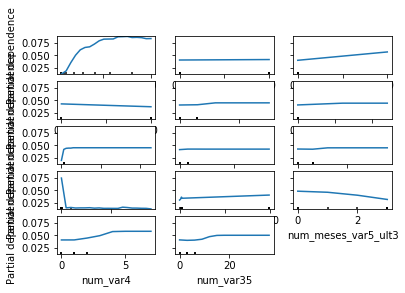

In [31]:
import matplotlib.pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
print('Computing partial dependence plots...')
#tic = time()
features = ['var15', 'ind_var5', 'ind_var8_0', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var30_0', 'num_var30', 'num_var42', 'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_var4', 'num_var35']
display = plot_partial_dependence(
       xgbc, X_train, features,
       n_jobs=3, grid_resolution=20,
    response_method = 'predict_proba'
)


In [32]:
# Let's see two most interesting plots 

Computing partial dependence plots...


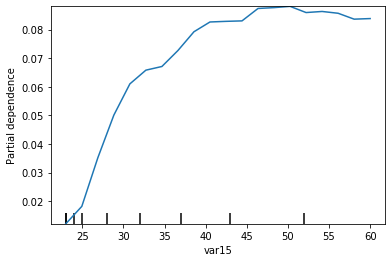

In [33]:
print('Computing partial dependence plots...')
#tic = time()
features = ['var15']
display = plot_partial_dependence(
       xgbc, X_train, features,
       n_jobs=3, grid_resolution=20,
    response_method = 'predict_proba'
)

Among all variables, var 5 has the steepest PD, and it also has the highest shapely value, we speculate it is the most important featrue. 

Computing partial dependence plots...


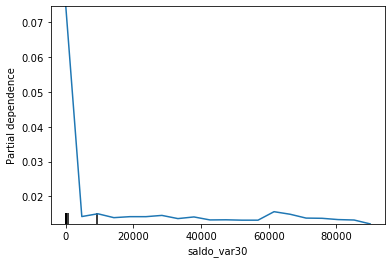

In [34]:
print('Computing partial dependence plots...')
#tic = time()
features = ['saldo_var30']
display = plot_partial_dependence(
       xgbc, X_train, features,
       n_jobs=3, grid_resolution=20,
    response_method = 'predict_proba'
)


In [35]:
# saldo_var show very steep partial dependence when the value is small (less than about 600), then the pd becomes very small and relatively smooth.

Train surrogate decision tree
Build a decision model to better understand our results

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier(max_depth = 3)

In [38]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [40]:
 
clf = clf.fit(X_train, y_train)

[Text(167.4, 195.696, 'X[9] <= 2.955\ngini = 0.076\nsamples = 76020\nvalue = [73012, 3008]'),
 Text(83.7, 152.208, 'X[0] <= 27.5\ngini = 0.161\nsamples = 21289\nvalue = [19403, 1886]'),
 Text(41.85, 108.72, 'X[0] <= 25.5\ngini = 0.048\nsamples = 11140\nvalue = [10868, 272]'),
 Text(20.925, 65.232, 'X[2] <= 0.5\ngini = 0.038\nsamples = 9406\nvalue = [9223, 183]'),
 Text(10.4625, 21.744, '\n  (...)  \n'),
 Text(31.387500000000003, 21.744, '\n  (...)  \n'),
 Text(62.775000000000006, 65.232, 'X[2] <= 0.5\ngini = 0.097\nsamples = 1734\nvalue = [1645, 89]'),
 Text(52.3125, 21.744, '\n  (...)  \n'),
 Text(73.2375, 21.744, '\n  (...)  \n'),
 Text(125.55000000000001, 108.72, 'X[6] <= 1.5\ngini = 0.267\nsamples = 10149\nvalue = [8535, 1614]'),
 Text(104.625, 65.232, 'X[0] <= 50.5\ngini = 0.023\nsamples = 339\nvalue = [335, 4]'),
 Text(94.16250000000001, 21.744, '\n  (...)  \n'),
 Text(115.0875, 21.744, '\n  (...)  \n'),
 Text(146.475, 65.232, 'X[0] <= 29.5\ngini = 0.274\nsamples = 9810\nvalue = [8200, 1610]'),
 Text(136.01250000000002, 21.744, '\n  (...)  \n'),
 Text(156.9375, 21.744, '\n  (...)  \n'),
 Text(251.10000000000002, 152.208, 'X[0] <= 26.5\ngini = 0.04\nsamples = 54731\nvalue = [53609, 1122]'),
 Text(209.25, 108.72, 'X[0] <= 25.5\ngini = 0.012\nsamples = 24771\nvalue = [24627, 144]'),
 Text(188.32500000000002, 65.232, 'X[0] <= 23.5\ngini = 0.009\nsamples = 22425\nvalue = [22324, 101]'),
 Text(177.8625, 21.744, '\n  (...)  \n'),
 Text(198.7875, 21.744, '\n  (...)  \n'),
 Text(230.175, 65.232, 'X[9] <= 15.15\ngini = 0.036\nsamples = 2346\nvalue = [2303, 43]'),
 Text(219.7125, 21.744, '\n  (...)  \n'),
 Text(240.63750000000002, 21.744, '\n  (...)  \n'),
 Text(292.95, 108.72, 'X[9] <= 297.06\ngini = 0.063\nsamples = 29960\nvalue = [28982, 978]'),
 Text(272.02500000000003, 65.232, 'X[5] <= 1.5\ngini = 0.096\nsamples = 13638\nvalue = [12945, 693]'),
 Text(261.5625, 21.744, '\n  (...)  \n'),
 Text(282.4875, 21.744, '\n  (...)  \n'),
 Text(313.875, 65.232, 'X[9] <= 8684.67\ngini = 0.034\nsamples = 16322\nvalue = [16037, 285]'),
 Text(303.4125, 21.744, '\n  (...)  \n'),
 Text(324.33750000000003, 21.744, '\n  (...)  \n')]

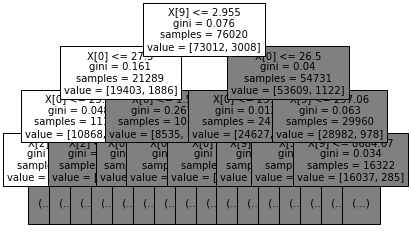

In [41]:
tree.plot_tree(clf,max_depth = 3, fontsize =10) 